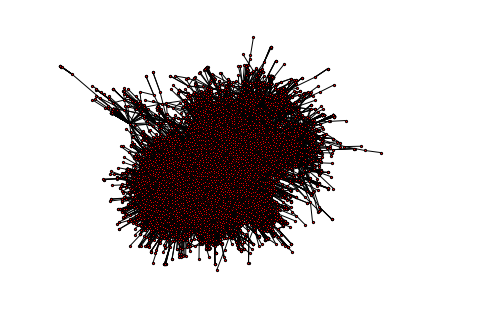

In [4]:
# Cargamos los archivos de datos sobre la red de internet

import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import pandas as pd

G = nx.read_gml('as-22july06.gml')

#G = nx.Graph()
#G.add_edges_from(G)
nx.draw(G, node_size=5)
plt.show()

In [ ]:
grados_G = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]

Datos = np.asarray(grados_G)

plt.hist(Dist_interg, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()


print('')
print('Datos de la red Y2H')
print('')
print(' <k>  = '+str(grados_media))
print('k_max = '+str(grados_max))
print('k_min = '+str(grados_min))